### 0. DATA IMPORT & CLEANING
___

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from spectrai.datasets import (load_spectra_astorga_arg, load_measurements_astorga_arg, load_data_astorga_arg,
                               load_spectra_schmitter_vnm, load_spectra_rep_schmitter_vnm,
                               load_measurements_schmitter_vnm, load_data_schmitter_vnm)

from spectrai.datasets.kssl import (load_spectra_kssl,
                                    _get_lookup_smp_id_scan_path)

%load_ext autoreload
%autoreload 2
%matplotlib inline  

### I. Loading Romina's (ARG) data

#### I.1 Spectra

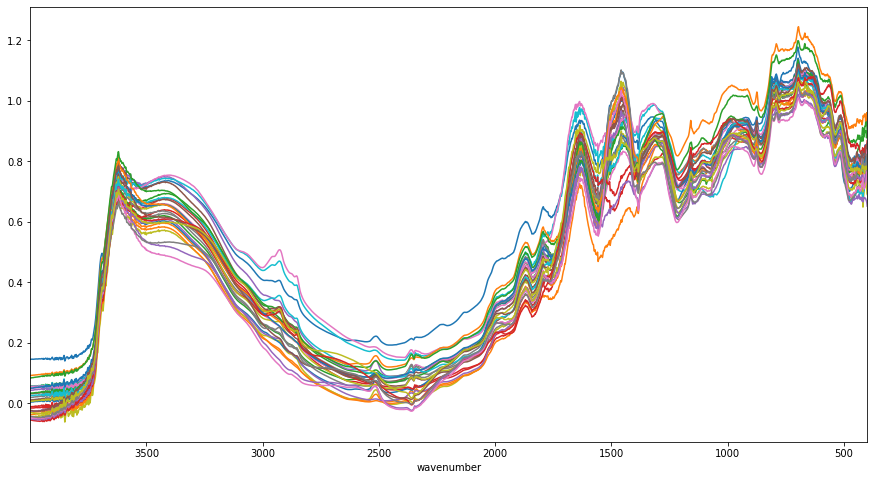

In [2]:
# Load
df = load_spectra_astorga_arg()
df.reset_index().plot(x='wavenumber', y=df.columns[1:], legend=False, figsize=(15, 8)).invert_xaxis()

In [3]:
df.head()

,AR01,AR02,AR03,AR04,AR05,AR06,AR07,AR08,AR09,AR10,...,AR21,AR22,AR23,AR24,AR25,AR26,AR27,AR28,AR29,AR30
wavenumber,,,,,,,,,,,,,,,,,,,,,
3999.808,0.048893,0.145164,-0.030878,0.056050,-0.011685,0.042582,0.031182,0.048815,0.010951,-0.045550,...,0.025065,0.049695,0.091954,0.083659,-0.054411,-0.051096,-0.023185,-0.046925,-0.042485,-0.029995
3999.326,0.048938,0.145192,-0.030839,0.056054,-0.011583,0.042685,0.031278,0.048883,0.011025,-0.045477,...,0.025120,0.049782,0.092022,0.083741,-0.054485,-0.051159,-0.023245,-0.046996,-0.042562,-0.030073
3998.844,0.049019,0.145251,-0.030763,0.056100,-0.011454,0.042803,0.031394,0.048960,0.011113,-0.045374,...,0.025200,0.049887,0.092103,0.083834,-0.054548,-0.051207,-0.023293,-0.047050,-0.042627,-0.030136
3998.362,0.049132,0.145337,-0.030655,0.056189,-0.011307,0.042936,0.031526,0.049039,0.011205,-0.045241,...,0.025300,0.050001,0.092187,0.083931,-0.054607,-0.051245,-0.023337,-0.047093,-0.042687,-0.030188
3997.880,0.049265,0.145440,-0.030520,0.056313,-0.011150,0.043080,0.031670,0.049117,0.011298,-0.045080,...,0.025419,0.050117,0.092267,0.084024,-0.054663,-0.051276,-0.023378,-0.047127,-0.042744,-0.030231


#### I.2 Measurements

In [3]:
load_measurements_astorga_arg().head(20)

,Arg Code,Fe,Ti,Ca,P,Ba
1,AR01,2.99,0.37405,2.448,0.17285,511.85
2,AR02,5.2215,0.4446,3.4865,0.07335,358.9
3,AR03,3.875,0.46265,2.1445,0.11105,563.8
4,AR04,5.3215,0.5126,3.79,0.1119,375.3
5,AR05,3.3445,0.40035,3.3665,0.1465,529.95
6,AR06,3.047,0.37485,3.2445,0.1183,546.6
7,AR07,3.7825,0.45465,2.7685,0.11275,531.6
8,AR08,4.543,0.46795,2.914,0.09495,480.8
9,AR09,3.6335,0.4354,2.8,0.14125,549.2
10,AR10,3.0725,0.38325,3.099,0.10295,547.75


#### I.3 All data bundled as NumPy arrays (ML/DL ready)

In [3]:
X, X_names, y, y_names, instances_id = load_data_astorga_arg()
print('X shape: ', X.shape)
print(y_names)
print(instances_id)

X shape:  (30, 7467)
['Fe' 'Ti' 'Ca' 'P' 'Ba']
['AR01' 'AR02' 'AR03' 'AR04' 'AR05' 'AR06' 'AR07' 'AR08' 'AR09' 'AR10'
 'AR11' 'AR12' 'AR13' 'AR14' 'AR15' 'AR16' 'AR17' 'AR18' 'AR19' 'AR20'
 'AR21' 'AR22' 'AR23' 'AR24' 'AR25' 'AR26' 'AR27' 'AR28' 'AR29' 'AR30']


In [4]:
X_names

array([3999.808 , 3999.326 , 3998.844 , ...,  401.138 ,  400.6559,
        400.1737])

In [5]:
X.shape

(30, 7467)

In [6]:
y_names

array(['Fe', 'Ti', 'Ca', 'P', 'Ba'], dtype=object)

In [7]:
instances_id

array(['AR01', 'AR02', 'AR03', 'AR04', 'AR05', 'AR06', 'AR07', 'AR08',
       'AR09', 'AR10', 'AR11', 'AR12', 'AR13', 'AR14', 'AR15', 'AR16',
       'AR17', 'AR18', 'AR19', 'AR20', 'AR21', 'AR22', 'AR23', 'AR24',
       'AR25', 'AR26', 'AR27', 'AR28', 'AR29', 'AR30'], dtype=object)

### II. Loading Petra's (VNM) data

#### II.1 Spectra

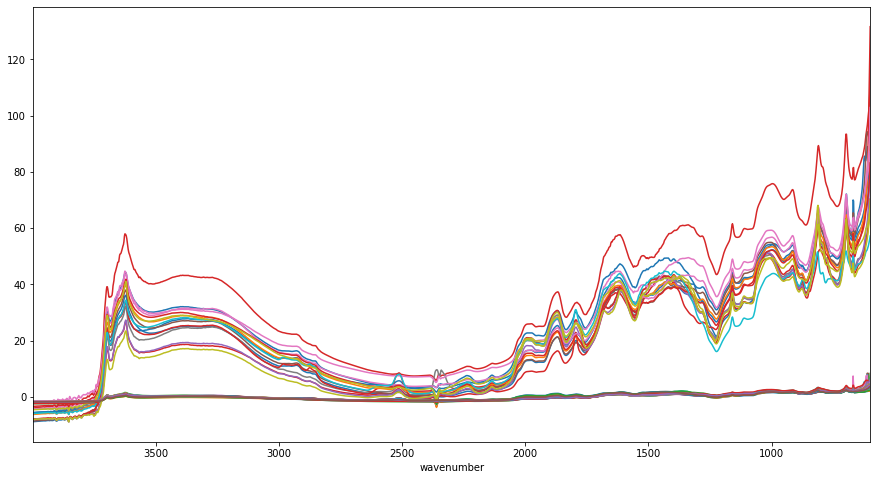

In [5]:
df = load_spectra_schmitter_vnm()
df.reset_index().plot(x='wavenumber', y=df.columns[1:], legend=False, figsize=(15, 8)).invert_xaxis()

#### II.2 Spectra with replicates

In [6]:
df_petra_rep = load_spectra_rep_schmitter_vnm()
df_petra_rep.head()

,3179,3180,3181,3182,3183,3184,3185,3186,3187,3188,...,4912,4913,4914,4915,4916,4917,4918,4919,4920,4921
wavenumber,,,,,,,,,,,,,,,,,,,,,
3997.754689,-0.058851,-0.070614,-0.054410,-0.017036,-0.032874,-0.024359,-0.091122,-0.016153,-0.003196,-0.179961,...,-0.163059,-0.143101,-0.176583,-0.155702,-0.121631,-0.166089,-0.098744,-0.036523,-0.191762,-0.112193
3995.826201,-0.058633,-0.070425,-0.054260,-0.016834,-0.032688,-0.024157,-0.090900,-0.015950,-0.002959,-0.179763,...,-0.162956,-0.142935,-0.176453,-0.155582,-0.121484,-0.165978,-0.098600,-0.036496,-0.191582,-0.112051
3993.897714,-0.058434,-0.070294,-0.054170,-0.016678,-0.032460,-0.024002,-0.090624,-0.015780,-0.002748,-0.179531,...,-0.162822,-0.142715,-0.176281,-0.155439,-0.121303,-0.165808,-0.098417,-0.036408,-0.191369,-0.111887
3991.969226,-0.058272,-0.070153,-0.054037,-0.016518,-0.032181,-0.023809,-0.090358,-0.015603,-0.002515,-0.179266,...,-0.162611,-0.142506,-0.176085,-0.155255,-0.121098,-0.165618,-0.098242,-0.036316,-0.191181,-0.111736
3990.040739,-0.057997,-0.069773,-0.053719,-0.016262,-0.031732,-0.023421,-0.089922,-0.015246,-0.002090,-0.178832,...,-0.162359,-0.142300,-0.175850,-0.155033,-0.120873,-0.165410,-0.098025,-0.036213,-0.190992,-0.111561


* **Prepare lookup tables for group of replicates**

In [11]:
VIETNAM_LOOKUP_URL = os.path.join(DATA_PATH, 'vnm-petra', 'vietnam-petra', 'Overview list.xls')

In [12]:
df_lookup = pd.read_excel(VIETNAM_LOOKUP_URL, sheet_name='Petra 1.1', usecols=[0,2,3], names=['group_id', 'spectra_id', 'mir_label'])
df_lookup.fillna(method='ffill', inplace=True)
#df_lookup = df_lookup.astype(int)
df_lookup['spectra_id'] = df_lookup['spectra_id'].astype(int)
df_lookup.head()

,group_id,spectra_id,mir_label
0,1.0,3179,NF1 1.1
1,1.0,3180,NF1 1.1
2,1.0,3181,NF1 1.1
3,2.0,3182,NF1 1.2
4,2.0,3183,NF1 1.2


In [13]:
lookup_tot_spectra_id = {}
for name, group in df_lookup.groupby('mir_label'):
    lookup_tot_spectra_id[name] = group['spectra_id'].values

In [14]:
lookup_tot_spectra_id

{' Overwritten with 4600!': array([4500, 4501]),
 'F1 1.1A': array([3281, 3282, 3283]),
 'F1 1.1B': array([3284, 3285, 3286]),
 'F1 1.2A': array([3299, 3300, 3301]),
 'F1 1.2B': array([3302, 3303, 3304]),
 'F1 1.3A': array([3305, 3306, 3307]),
 'F1 1.3B': array([3308, 3309, 3310]),
 'F1 1.4A': array([3311, 3312, 3313]),
 'F1 1.4B': array([3314, 3315, 3316]),
 'F1 1.5A': array([3317, 3318, 3319]),
 'F1 1.5B': array([3320, 3321, 3322]),
 'F1 2.1': array([3476, 3477, 3478]),
 'F1 2.2': array([3479, 3480, 3481]),
 'F1 2.3': array([3482, 3483, 3484]),
 'F1 2.4': array([3485, 3486, 3487]),
 'F1 2.5': array([3488, 3489, 3490]),
 'F1 2.6': array([3491, 3492, 3493]),
 'F1 3.1': array([3494, 3495, 3496]),
 'F1 3.2': array([3497, 3498, 3499]),
 'F1 3.3': array([3500, 3501, 3502, 3503]),
 'F1 3.4': array([3504, 3505, 3506, 3507]),
 'F1 3.5': array([3508, 3509, 3510]),
 'F1 3.6': array([3511, 3512, 3513]),
 'F1 4.1A': array([3518, 3519, 3520]),
 'F1 4.1B': array([3521, 3522, 3523]),
 'F1 4.2A': arr

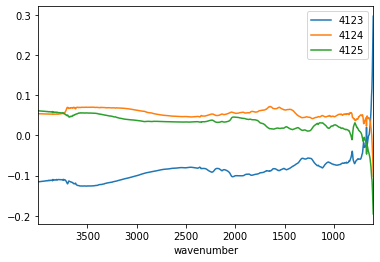

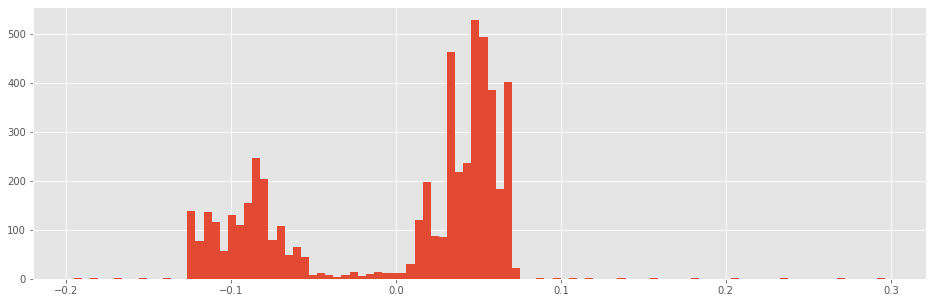

In [15]:
TOTAL_LABEL = 'F4 1.1'
df_group = df_petra_rep[lookup_tot_spectra_id[TOTAL_LABEL]]
df_group = df_group.apply(lambda x: x - df_group.mean(axis=1))

df_group.plot().invert_xaxis()
all_values = df_group.values.flatten()

with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(16, 5))
    ax.hist(all_values, bins=100)

In [16]:
# Is labeled data the mean of replicates?
DATA_PATH = os.path.join('..', 'data')
VIETNAM_PATH =  os.path.join('vnm-petra', 'mir-models')
DATA_URL = os.path.join(DATA_PATH, VIETNAM_PATH, '*.*')
VIETNAM_MEAS_URL = os.path.join(DATA_PATH, 'vnm-petra', 'mir-models', '20090215-soil-database-mirs.xls')

X, X_names, y, y_names, instances_id, lookup_tot_mir_label = spa.load_data_petra(DATA_URL, VIETNAM_MEAS_URL)
lookup_tot_mir_label

{'F4 1.1': 'Av001',
 'F4 1.3': 'Av003',
 'F4 1.5': 'Av005',
 'F4 2.3': 'Av008',
 'F4 3.2': 'Av013',
 'F4 3.3': 'Av014',
 'F4 4.1': 'Av018',
 'F4 4.3': 'Av020',
 'F4 4.6': 'Av023',
 'F4 5.3': 'Av026',
 'F4 5.4': 'Av027',
 'F4 6.3': 'Av032',
 'F4 7.1': 'Av036',
 'F4 7.3': 'Av038',
 'F4 7.5': 'Av040',
 'NF4 1.1': 'Av041',
 'NF4 1.2': 'Av042',
 'NF4 2.1': 'Av043',
 'NF4 2.3': 'Av045',
 'NF4 2.6': 'Av048',
 'NF4 3.3a': 'Av051',
 'NF4 4.3': 'Av057',
 'NF4 5.1': 'Av061',
 'NF4 5.3': 'Av062',
 'NF4 5.4': 'Av063',
 'NF4 5.5': 'Av064',
 'F5 1.1': 'Av065',
 'F5 1.3': 'Av067',
 'F5 1.5': 'Av069',
 'F5 2.3': 'Av072',
 'F5 2.8': 'Av077',
 'F5 3.3': 'Av080',
 'F5 3.6': 'Av083',
 'F5 4.3': 'Av086',
 'F5 5.3': 'Av092',
 'F5 6.3': 'Av098',
 'F5 7.1': 'Av100',
 'F5 7.3': 'Av102',
 'F5 7.6': 'Av105',
 'NF5 1.1': 'Av106',
 'NF5 1.3': 'Av108',
 'NF5 1.5': 'Av110',
 'NF5 2.3': 'Av113',
 'NF5 3.3': 'Av121',
 'NF5 4.3': 'Av127',
 'NF5 5.3': 'Av133',
 'NF5 6.3': 'Av139',
 'NF5 7.1': 'Av141',
 'NF5 7.3': 'Av143'

In [17]:
# Replicates for TOTAL_LABEL
df_rep_vs_sel = df_petra_rep[lookup_tot_spectra_id[TOTAL_LABEL]]
df_rep_vs_sel.head()

,4123,4124,4125
wavenumber,,,
3997.754689,-0.140290,0.029159,0.036384
3995.826201,-0.140014,0.029361,0.036651
3993.897714,-0.139677,0.029607,0.036847
3991.969226,-0.139323,0.029862,0.036998
3990.040739,-0.138998,0.030084,0.037177


In [18]:
def normalize(X):
    return (X - X.min()) / (X.max() - X.min())

In [19]:
normalize(X[row_spectra,:])

NameError: name 'row_spectra' is not defined

In [ ]:
row_spectra = list(instances_id).index(lookup_tot_mir_label[TOTAL_LABEL])
df_rep_vs_sel['selected'] = normalize(X[row_spectra,:]).tolist()
df_rep_vs_sel

In [ ]:
df_rep_vs_sel.reset_index().plot(x='wavenumber', y=df_rep_vs_sel.columns[0:], legend=True, figsize=(15, 8)).invert_xaxis()

#### II.3 Measurements

In [7]:
load_measurements_schmitter_vnm()

,total_label,TC,TOC,TIC,TN,CEC,K,FCAVER,FCIAVER,FSAAVER
mir_label,,,,,,,,,,
Av001,F4 1.1,1.142395,1.0800,0.062395,0.16,4.545833,6.17500,0.110000,0.544000,0.346000
Av003,F4 1.3,2.155918,1.2200,0.935918,0.16,7.451389,6.47000,0.158000,0.481333,0.360667
Av005,F4 1.5,1.299190,1.1900,0.109190,0.17,8.271528,6.62000,0.114125,0.587000,0.298875
Av008,F4 2.3,1.689977,1.4300,0.259977,0.21,9.727083,7.23000,0.171000,0.523500,0.305500
Av013,F4 3.2,2.099544,1.4600,0.639544,0.19,9.338889,8.03000,0.142500,0.660500,0.197000
...,...,...,...,...,...,...,...,...,...,...
NF1 4.1B,NF1 4.1B,1.630000,1.4068,0.223200,0.13,9.594444,7.95405,0.136500,0.730500,0.133000
NF1 4.4A,NF1 4.4A,2.420000,2.2280,0.192000,0.20,11.570139,9.57916,0.137500,0.804000,0.058500
NF1 4.4B,NF1 4.4B,2.180000,1.7744,0.405600,0.16,10.481250,7.64498,0.141000,0.795000,0.064000


#### II.4 All data bundled as NumPy arrays (ML/DL ready)

In [9]:
X, X_names, y, y_names, instances_id, lookup = load_data_schmitter_vnm()
print('X shape: ', X.shape)
print(lookup)
print(y_names)
print(instances_id)

X shape:  (130, 1763)
{'F4 1.1': 'Av001', 'F4 1.3': 'Av003', 'F4 1.5': 'Av005', 'F4 2.3': 'Av008', 'F4 3.2': 'Av013', 'F4 3.3': 'Av014', 'F4 4.1': 'Av018', 'F4 4.3': 'Av020', 'F4 4.6': 'Av023', 'F4 5.3': 'Av026', 'F4 5.4': 'Av027', 'F4 6.3': 'Av032', 'F4 7.1': 'Av036', 'F4 7.3': 'Av038', 'F4 7.5': 'Av040', 'NF4 1.1': 'Av041', 'NF4 1.2': 'Av042', 'NF4 2.1': 'Av043', 'NF4 2.3': 'Av045', 'NF4 2.6': 'Av048', 'NF4 3.3a': 'Av051', 'NF4 4.3': 'Av057', 'NF4 5.1': 'Av061', 'NF4 5.3': 'Av062', 'NF4 5.4': 'Av063', 'NF4 5.5': 'Av064', 'F5 1.1': 'Av065', 'F5 1.3': 'Av067', 'F5 1.5': 'Av069', 'F5 2.3': 'Av072', 'F5 2.8': 'Av077', 'F5 3.3': 'Av080', 'F5 3.6': 'Av083', 'F5 4.3': 'Av086', 'F5 5.3': 'Av092', 'F5 6.3': 'Av098', 'F5 7.1': 'Av100', 'F5 7.3': 'Av102', 'F5 7.6': 'Av105', 'NF5 1.1': 'Av106', 'NF5 1.3': 'Av108', 'NF5 1.5': 'Av110', 'NF5 2.3': 'Av113', 'NF5 3.3': 'Av121', 'NF5 4.3': 'Av127', 'NF5 5.3': 'Av133', 'NF5 6.3': 'Av139', 'NF5 7.1': 'Av141', 'NF5 7.3': 'Av143', 'NF5 7.6': 'Av146', '2F6

### III. Loading KSSL data

Note: To read Bruker optics spectra in `*.0` format, two python packages are available:
1. https://www.bruker.com/products/infrared-near-infrared-and-raman-spectroscopy/ft-ir-routine-spectrometers/hts-xt.html
2. https://stuart-cls.github.io/python-opusfc-dist/

The second one is used.

#### III.1 Spectra

In [2]:
df = load_spectra_kssl()

100%|██████████| 20/20 [01:45<00:00,  5.26s/it]


In [3]:
df.head()

,smp_id,3999,3997,3995,3993,3992,3990,3988,3986,3984,...,617,615,613,611,609,607,605,603,601,599
0,41455,0.222775,0.223150,0.223425,0.223800,0.224250,0.224775,0.225325,0.225650,0.225775,...,1.586225,1.576550,1.565950,1.553525,1.539100,1.523650,1.509075,1.496350,1.485200,1.476025
1,41456,0.197025,0.197425,0.197750,0.198150,0.198625,0.199150,0.199675,0.200000,0.200175,...,1.596675,1.586275,1.575550,1.562925,1.548950,1.535175,1.521950,1.509325,1.498025,1.488400
2,41457,0.224775,0.225275,0.225700,0.226200,0.226725,0.227325,0.227975,0.228375,0.228600,...,1.666050,1.657275,1.647450,1.634300,1.618750,1.602425,1.586525,1.572275,1.559800,1.548800
3,41458,0.193425,0.193825,0.194125,0.194475,0.194900,0.195400,0.195925,0.196175,0.196300,...,1.592350,1.583975,1.574700,1.562875,1.549025,1.534800,1.521575,1.510200,1.500775,1.493050
4,41459,0.228275,0.228750,0.229100,0.229575,0.230050,0.230600,0.231175,0.231525,0.231700,...,1.627000,1.616025,1.604075,1.590550,1.576025,1.561650,1.548025,1.535550,1.524400,1.514525


In [4]:
df.shape

(79842, 1765)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79842 entries, 0 to 79841
Columns: 1765 entries, smp_id to 599
dtypes: float64(1764), int64(1)
memory usage: 1.0 GB
